<a href="https://colab.research.google.com/github/HARITHA-14/ml-projects/blob/main/loan_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Analyse data set

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\LoanAmountlPrediction (1).csv")

# 2.head,tail check for null values,duplicate values.

In [ ]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
print(data.head())


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [ ]:
print(data.tail())


      Loan_ID  Gender Married  Dependents Education Self_Employed  \
593  LP002978  Female      No         0.0  Graduate            No   
594  LP002979    Male     Yes         3.0  Graduate            No   
595  LP002983    Male     Yes         1.0  Graduate            No   
596  LP002984    Male     Yes         2.0  Graduate            No   
597  LP002990  Female      No         0.0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
593             2900                0.0        71.0             360.0   
594             4106                0.0        40.0             180.0   
595             8072              240.0       253.0             360.0   
596             7583                0.0       187.0             360.0   
597             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
593             1.0         Rural           Y  
594             1.0         Rural           Y  
59

In [ ]:
print(data.isnull().sum())


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


# 3. Impute null values using KNN imputer.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [ ]:
imputer = KNNImputer(n_neighbors=5)
data_filled = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)
data_filled['Loan_ID'] = data['Loan_ID']


In [ ]:
print("Null Values:")
print(data.isnull().sum())
print("\nDuplicates:")
print(data.duplicated().sum())


Null Values:
Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Duplicates:
0


# 4. Explore all columns

In [ ]:
print(data_filled.describe())
print(data_filled.info())

       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  598.000000       598.000000         598.000000  598.000000   
mean     0.757191      5292.252508        1631.499866  144.870569   
std      0.999987      5807.265364        2953.315785   82.754184   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.000000   
50%      0.000000      3806.000000        1211.500000  127.000000   
75%      1.150000      5746.000000        2324.000000  165.750000   
max      3.000000     81000.000000       41667.000000  650.000000   

       Loan_Amount_Term  Credit_History  
count        598.000000      598.000000  
mean         341.911706        0.843144  
std           64.527526        0.351419  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000  


In [ ]:
print(data_filled.head())


   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0         0.0           5849.0                0.0       147.8   
1         1.0           4583.0             1508.0       128.0   
2         0.0           3000.0                0.0        66.0   
3         0.0           2583.0             2358.0       120.0   
4         0.0           6000.0                0.0       141.0   

   Loan_Amount_Term  Credit_History  
0             360.0             1.0  
1             360.0             1.0  
2             360.0             1.0  
3             360.0             1.0  
4             360.0             1.0  


# 5. Find relationship between dependent variable (LoanAmount) and independent variables.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
correlation_matrix = data_filled.corr()
print(correlation_matrix['LoanAmount'].sort_values(ascending=False))


LoanAmount           1.000000
ApplicantIncome      0.540108
CoapplicantIncome    0.201106
Dependents           0.114805
Loan_Amount_Term     0.051024
Credit_History      -0.008535
Name: LoanAmount, dtype: float64


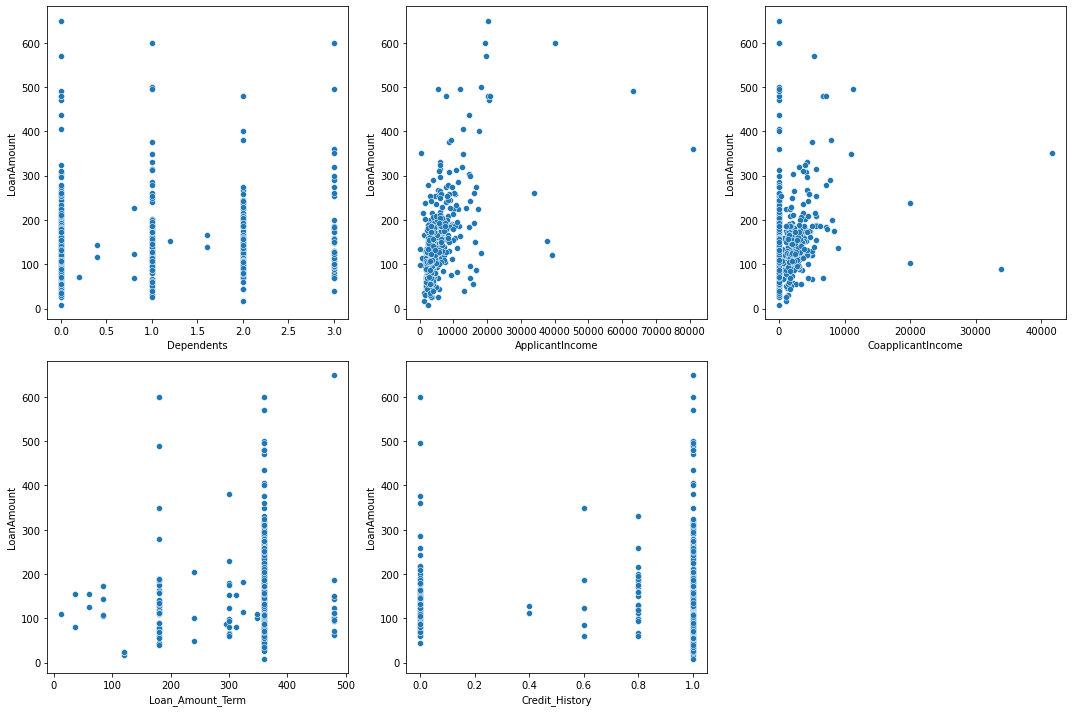

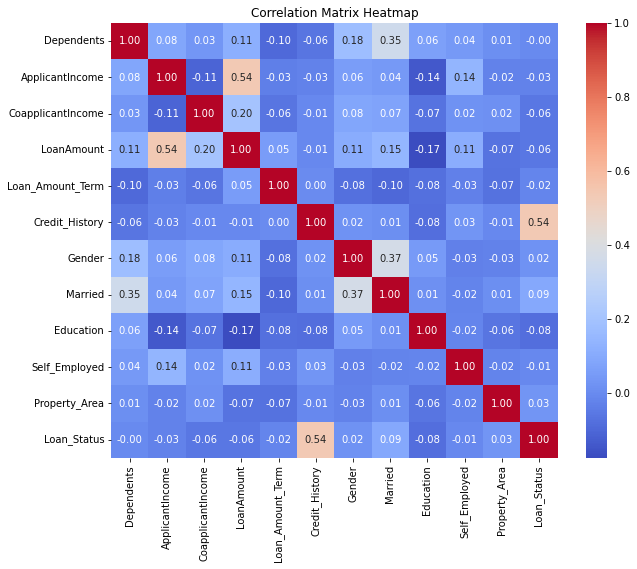

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Dependents', y='LoanAmount', data=data_filled)
plt.subplot(2, 3, 2)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data_filled)
plt.subplot(2, 3, 3)
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=data_filled)
plt.subplot(2, 3, 4)
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data=data_filled)
plt.subplot(2, 3, 5)
sns.scatterplot(x='Credit_History', y='LoanAmount', data=data_filled)

plt.tight_layout()
plt.show()

# Step 6: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_filled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Step 6: Find Spearman correlation among numerical columns



In [ ]:
spearman_corr = data_filled.corr(method='spearman')
print(spearman_corr)

                   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Dependents           1.000000         0.133291          -0.037326    0.122953   
ApplicantIncome      0.133291         1.000000          -0.304677    0.533598   
CoapplicantIncome   -0.037326        -0.304677           1.000000    0.240790   
LoanAmount           0.122953         0.533598           0.240790    1.000000   
Loan_Amount_Term    -0.089271        -0.012648          -0.023570    0.058840   
Credit_History      -0.072931         0.029022          -0.005077   -0.023742   

                   Loan_Amount_Term  Credit_History  
Dependents                -0.089271       -0.072931  
ApplicantIncome           -0.012648        0.029022  
CoapplicantIncome         -0.023570       -0.005077  
LoanAmount                 0.058840       -0.023742  
Loan_Amount_Term           1.000000        0.056744  
Credit_History             0.056744        1.000000  


# Step 7: Drop 'Loan_ID'



In [ ]:
if 'Loan_ID' in data.columns:
    data.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
print(data_filled.columns)


Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender'],
      dtype='object')


# Step 8: Perform Level Encoding

In [ ]:
data_filled['Gender'] = data['Gender']
data_filled['Married'] = data['Married']
data_filled['Education'] = data['Education']
data_filled['Self_Employed'] = data['Self_Employed']
data_filled['Property_Area'] =data['Property_Area']
data_filled['Loan_Status'] = data['Loan_Status']



label_encoder = LabelEncoder()
data_filled['Gender'] = label_encoder.fit_transform(data_filled['Gender'])
data_filled['Married'] = label_encoder.fit_transform(data_filled['Married'])
data_filled['Education'] = label_encoder.fit_transform(data_filled['Education'])
data_filled['Self_Employed'] = label_encoder.fit_transform(data_filled['Self_Employed'])
data_filled['Property_Area'] = label_encoder.fit_transform(data_filled['Property_Area'])
data_filled['Loan_Status'] = label_encoder.fit_transform(data_filled['Loan_Status'])


# Step 9: Remove Outliers using IQR method

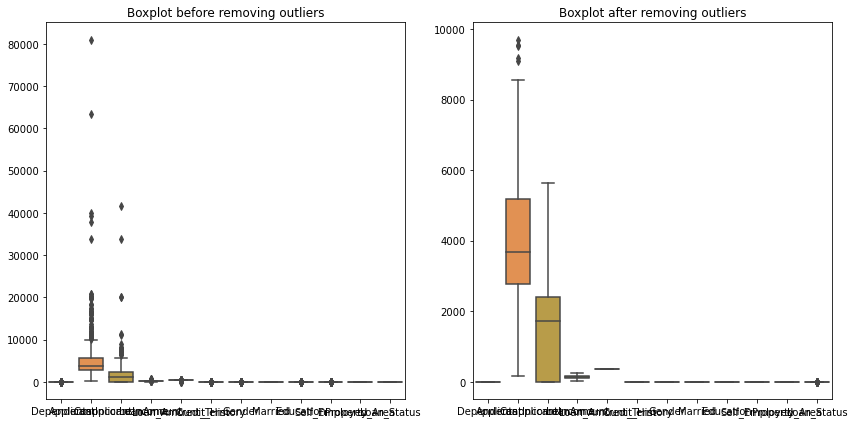

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data_filled)
plt.title("Boxplot before removing outliers")


Q1 = data_filled.quantile(0.25)
Q3 = data_filled.quantile(0.75)
IQR = Q3 - Q1
data_filtered = data_filled[~((data_filled < (Q1 - 1.5 * IQR)) | (data_filled > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.subplot(1, 2, 2)
sns.boxplot(data=data_filtered)
plt.title("Boxplot after removing outliers")

plt.tight_layout()
plt.show()


 # Step 10: Sanity Check for Outliers

In [ ]:
print(len(data_filled), len(data_filtered))

598 181


# Step 11: Split data into X and y

In [ ]:
X = data_filtered.drop(columns=['LoanAmount'])
y = data_filtered['LoanAmount']
print(X.shape,y.shape)

(181, 11) (181,)


# Step 12: Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 13: Perform Linear Regression, Decision Tree, and Random Forest

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# r2_score

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R^2 Score = {r2}")

Linear Regression: R^2 Score = 0.4270950071071141
Decision Tree: R^2 Score = 0.0005991068765314189
Random Forest: R^2 Score = 0.44705401411996304


In [ ]:
from sklearn.metrics import mean_squared_error

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")


Linear Regression: Mean Squared Error = 982.8644899918355
Decision Tree: Mean Squared Error = 1681.0962162162161
Random Forest: Mean Squared Error = 979.5123429189183
